In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datapath='/Volumes/ExtremeSSD/data_source/nova_mashuaibing'

In [6]:
light1=np.loadtxt('%s/1lv1.txt'%datapath)
logt1,E1,error1=light1[:,0],light1[:,1],light1[:,2]

light2=np.loadtxt('%s/1lv2.txt'%datapath)
logt2,E2,error2=light2[:,0],light2[:,1],light2[:,2]

light3=np.loadtxt('%s/1lv3.txt'%datapath)
logt3,E3,error3=light3[:,0],light3[:,1],light3[:,2]

light4=np.loadtxt('%s/1lv4.txt'%datapath)
logt4,E4,error4=light4[:,0],light4[:,1],light4[:,2]


In [7]:
logt1.shape,E1.shape,error1.shape

((49,), (49,), (49,))

In [ ]:
#plt.plot(logt1,E1,'ro')

<ErrorbarContainer object of 3 artists>

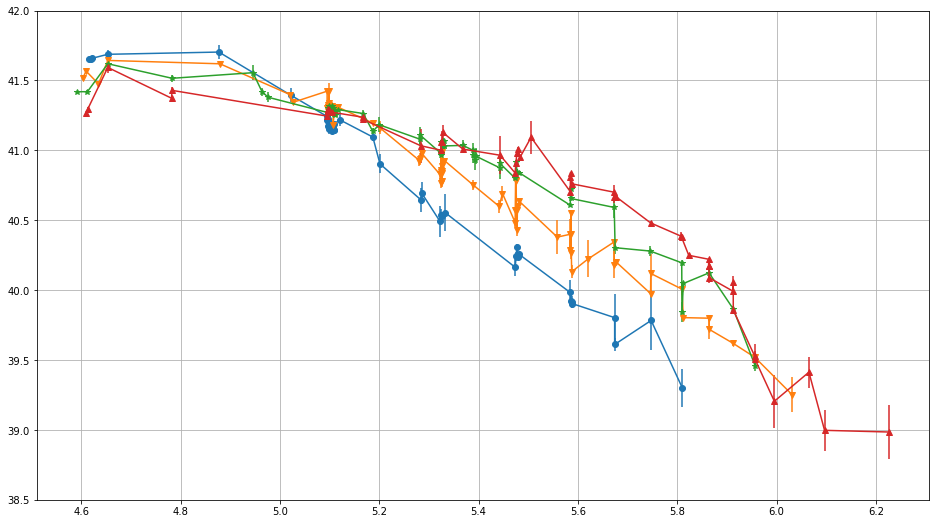

In [8]:
from IPython.core.pylabtools import figsize
figsize(16,9)
plt.grid()
#plt.xlim(2,6.3)
plt.ylim(38.5,42)
plt.errorbar(logt1,E1,yerr=error1,marker='o',fmt='')
plt.errorbar(logt2,E2,yerr=error2,marker='v',fmt='')
plt.errorbar(logt3,E3,yerr=error3,marker='*',fmt='')
plt.errorbar(logt4,E4,yerr=error4,marker='^',fmt='')

In [11]:
c=2.998*10*10
G=6.672*10**(-8)
Msun=1.99*10**33
alpha=0.1#viscosity

In [18]:
def JBH(MBH,a):
    return a*G*MBH**2/c
def Z1(a):
    return 1+(1-a**2)**(1.0/3)*((1+a)**(1.0/3)+(1-a**2)**(1.0/3))
def Z2(a):
    return (3*a**2+Z1(a)**2)**0.5
def Rms(a):
    return 3+Z2(a)-((3-Z1(a))*(3+Z1(a)+2*Z2(a)))**0.5
def chims(a):
    return Rms(a)**0.5
def q(a):
    return (1-a**2)**0.5
def A(a):
    return ((1-q(a))/(1+q(a))**0.5
            
def Omegams(MBH,a,chims):
    return c**3/(G*MBH)/(chims(a)**3+a)
def OmegaH(MBH,a):
    return c**3*a/(2*G*MBH*(1+q(a)))           
def rms(MBH,a):
    return Rms(a)*G*MBH/c**2
def rH(MBH,a):
    return G*MBH*(1+q(a))/c**2
def Jms(MBH,a):
    return 2*G*MBH*(3*chims(a)-2*a)/(3**0.5*c*chims(a))
def Ems(a):
    return (4*chims(a)-3*a)/(3**0.5*c*chims(a)**2)
def Mdot(Md,Jd,MBH,a):
    return alpha*G**2*Md**4*MBH**2/Jd**3
def Bms2(Md,Jd,MBH,a):
    return (rms(MBH,a)/rH(MBH,a))**(-5/2)*2*Mdot(Md,Jd,MBH,a)*c/rH(MBH,a)**2
def PBZ(Md,Jd,MBH,a):
    return 2*Mdot(Md,Jd,MBH,a)*c**2*(np.arctan(A(a))-a/2)/(A(a)*(1+q(a))**2)
def PBP(Md,Jd,MBH,a):
    return Bms2(Md,Jd,MBH,a)*rms(MBH,a)**4*Omegams(MBH,a)**2/32/c
def DMd(Md,Jd,MBH,a):
    return -Mdot(Md,Jd,MBH,a)
def DJd(Md,Jd,MBH,a):
    return -Mdot(Md,Jd,MBH,a)*Jms(MBH,a)-PBP(Md,Jd,MBH,a)/Omegams(MBH,a)
def DMBH(Md,Jd,MBH,a):
    return Mdot(Md,Jd,MBH,a)*Ems(a)-PBZ(Md,Jd,MBH,a)/c**2
def Dastar(Md,Jd,MBH,a):
    return c/(G*MBH**2)*(Mdot(Md,Jd,MBH,a)*Jms(MBH,a)-PBZ(Md,Jd,MBH,a)/(0.5*OmegaH(MBH,a)))-2*a/MBH*(Mdot(Md,Jd,MBH,a)*Ems(a)-PBZ(Md,Jd,MBH,a)/c**2)
def Dp(Gamma):
    return 1/(Gamma*(1-(1-1/Gamma**2)**0.5))

def f1(Gamma):
    return (1-1/Gamma**2)**0.5*c/(1-(1-1/Gamma**2)**0.5)
def f2(Gamma,R):
    return Dp(Gamma)*4*np.pi*R**2*(1-1/Gamma**2)**0.5*c

                 

SyntaxError: invalid syntax (<ipython-input-18-10f1bd862232>, line 15)

In [14]:
tp00=1.3
tsigma=0.11
k=1.38*10**(-16)
aa=7.57*10**(-15)
h=6.626*10**(-27)
epsilon01=h*c/(lamda1*10**(-7))
epsilon02=h*c/(lamda2*10**(-7))
epsilon03=h*c/(lamda3*10**(-7))
epsilon04=h*c/(lamda4*10**(-7))
nu1=c/(lamda1*10**(-7))
nu2=c/(lamda2*10**(-7))
nu3=c/(lamda3*10**(-7))
nu4=c/(lamda4*10**(-7))

theta0=np.array([ , ])    
#BPfrenova(M0,aI,MdotI,xi,T90,MejI,kappaI,betaI,t0,tp,Mpeak,lamda1,lamda2,lamda3,lamda4)
M0=3*Msun
T90=1.7
aI=0.01

MdotI=0.01
xi=0.3
MejI=0.01
kappaI=10
betaI=0.15
Mpeak=10**(-6)*Msun

#t0=2 
#tp=4.6
#lamda_g lamda_r lamda_i lamda_z
 


tp0=0.01
R0=6*10**10
V0=4*np.pi*R0**3/3
Eint0=0.5*MejI*c**2*betaI**2
Gamma0=1/(1-betaI**2)**0.5
a0=aI
Mdot0=MdotI
Md0=MdotI*T90
Omegad0=Mdot0/alpha/Md0
rd0=(G*M0/Omegad0**2)**(1.0/3)
Jd0=Md0*rd0**2*Omegad0
MBH0=M0


SyntaxError: invalid syntax (<ipython-input-14-799683cd64b8>, line 15)